In [13]:
import re
import time
import pandas as pd
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [7]:
res1=[]
res2=[]
res3=[]
with open('honeypot1.log') as f:
    for line in f:
        if line.startswith('2018'):
            temp=line.split(' ', 2)
            res1.append(temp[0])
            res2.append(temp[1])
            res3.append(temp[2])


In [8]:
df=pd.DataFrame({'time':res1,'protocol':res2,'details':res3})
df.to_csv('honeypot2_1.csv',sep=',')

len(df)

3145153

In [9]:
failed_connection=0
for i in res3:
    if 'login' in i and 'failed' in i:
        failed_connection+=1
failed_connection

15293

In [10]:
succeed_connection=0
for i in res3:
    if 'login' in i and 'succeeded' in i:
        succeed_connection+=1
succeed_connection

18541

In [11]:
connection_time=[]
for i in res3:
    if 'Connection' in i and 'lost' in i and 'after' in i:
        connection_time.append(int(i.split(' ')[3]))
# len(connection_time) does not equal failed_connection + successful_connection
connection_time[:10]

[1, 2, 2, 5, 8, 2, 2, 1, 32, 2]

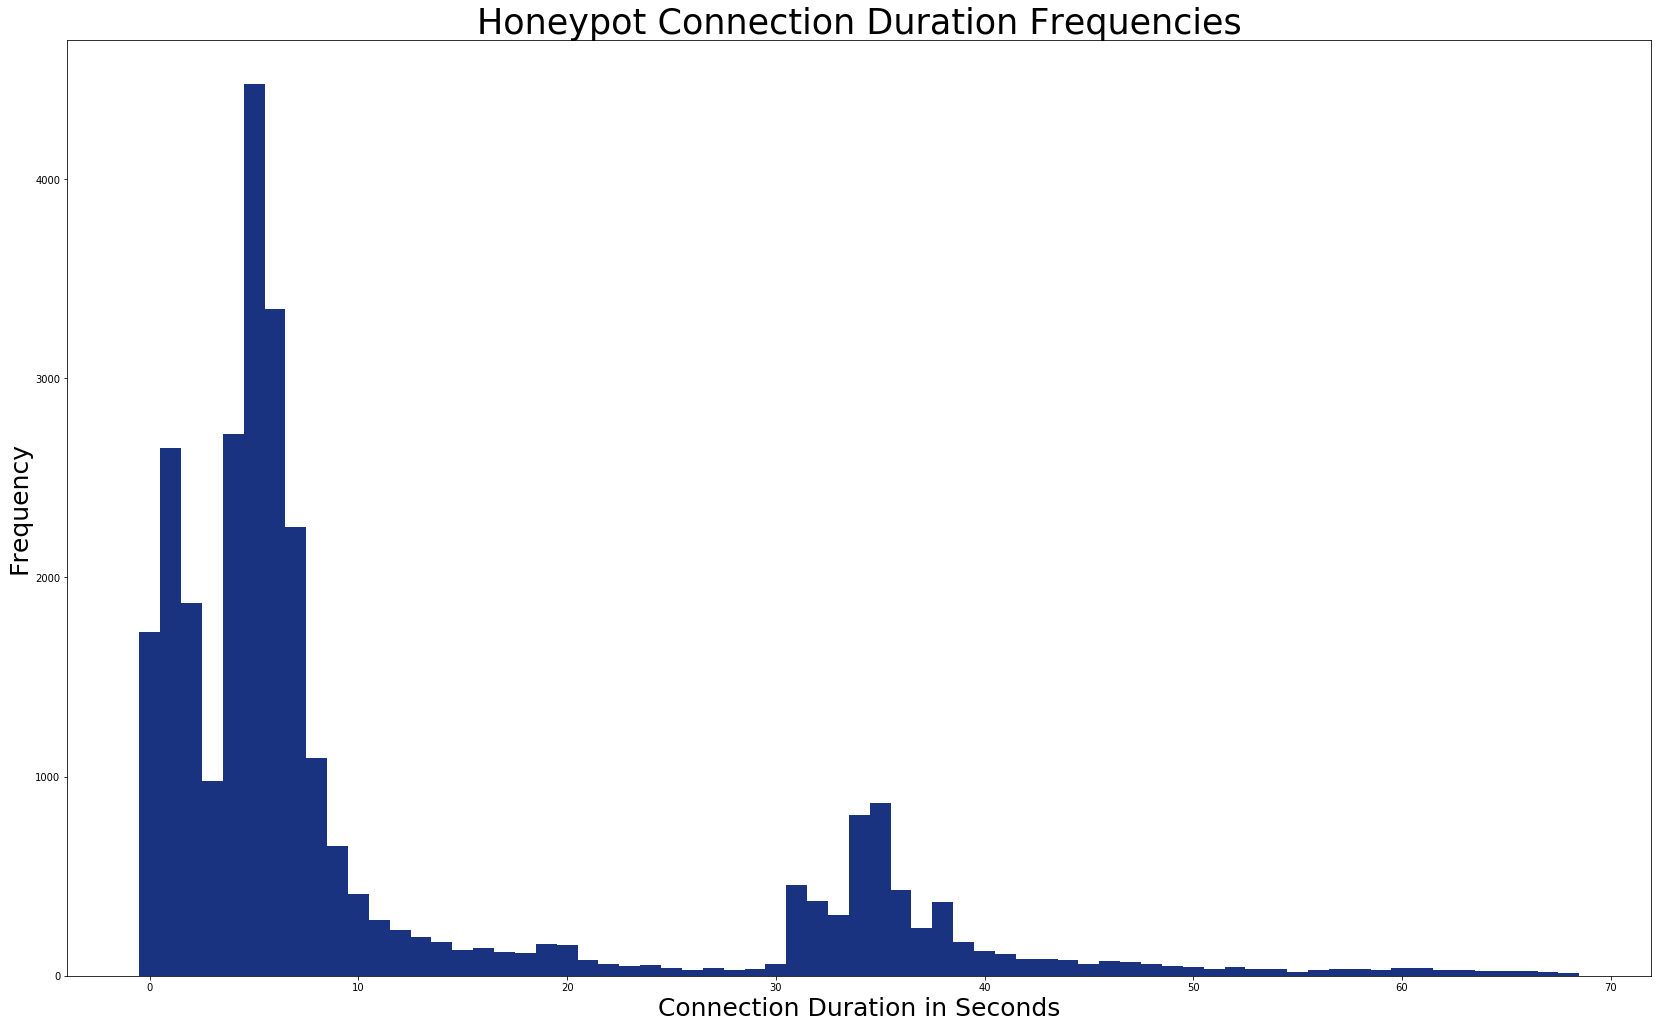

In [57]:
import numpy as np
import matplotlib.pyplot as plt
connection_time=np.asarray(connection_time)
fig = plt.figure()
fig.set_size_inches(22, 13, forward=True)
ax = fig.add_axes([1,1,1,1])
plt.hist(connection_time, color = (0.1, 0.2, 0.5) ,bins=np.arange(connection_time.min(), 70)-0.5)
plt.title('Honeypot Connection Duration Frequencies', fontsize = 35)
plt.xlabel('Connection Duration in Seconds', fontsize=25)
plt.ylabel('Frequency', fontsize=25)
plt.xticks()

fig.savefig('test.png')


In [64]:
# get list of login credentials attempted 
connection_password=[]
for i in res3:
    if 'login attempt' in i and ']' in i:
        temp=i.split('[')[1].split(']')[0]
        connection_password.append(temp)
len(connection_password)

33834

In [16]:
username,password=[],[]
for i in connection_password:
    temp=i.split('/')
    username.append(temp[0])
    if len(temp)==2:
        password.append(temp[1])
    else:
        password.append('')


In [17]:
dic_username,dic_password={},{}

for i in username:
    if i not in dic_username.keys():
        dic_username[i]=0
    else:
        dic_username[i]+=1

for j in password:
    if j not in dic_password.keys():
        dic_password[j]=0
    else:
        dic_password[j]+=1

In [79]:
from collections import Counter
import operator



h = dict(Counter(dic_password).most_common(10))

a = {k: v / len(connection_password) for k, v in h.items()}


sorted_a = sorted(a.items(), key=operator.itemgetter(1))
sorted_a

[('xmhdipc', 0.009280605308269787),
 ('xc3511', 0.011851983212153454),
 ('', 0.021162144588283974),
 ('root', 0.06381155051131997),
 ('sh\x00', 0.06901341845480877),
 ('system\x00', 0.07400839392327245),
 ('default', 0.09239226813264763),
 ('vizxv', 0.09661878583673228),
 ('admin', 0.1208843175503931),
 ('t0talc0ntr0l4!', 0.13524856653070874)]

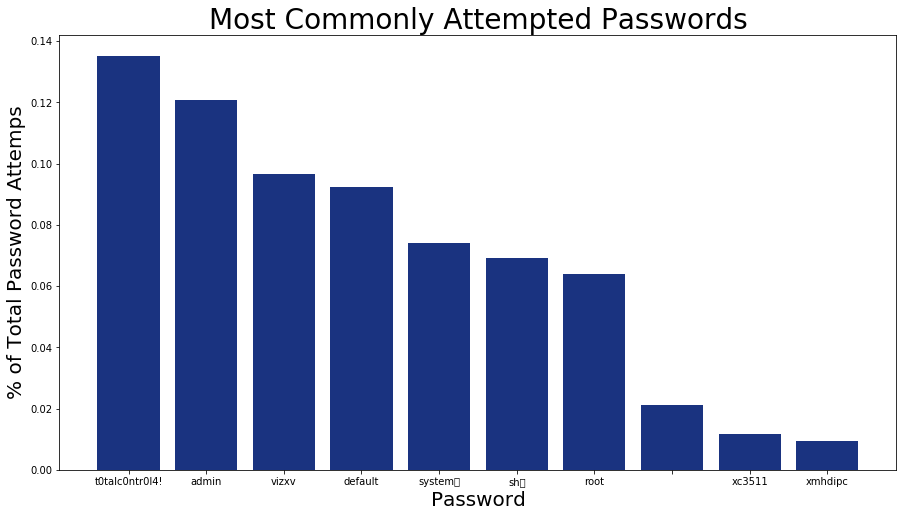

In [80]:
fig = plt.figure()
fig.set_size_inches(15, 8, forward=True)
plt.bar(range(len(a)), list(a.values()), align='center', color = (0.1, 0.2, 0.5))
plt.xticks(range(len(a)), list(a.keys()))
plt.title('Most Commonly Attempted Passwords', fontsize = 28)
plt.xlabel('Password', fontsize=20)
plt.ylabel('% of Total Password Attemps', fontsize=20)


plt.show()

In [81]:
h = dict(Counter(dic_username).most_common(10))

a = {k: v / len(connection_password) for k, v in h.items()}


sorted_a = sorted(a.items(), key=operator.itemgetter(1))
sorted_a

[('ubnt', 0.007241236625879293),
 ('oracle', 0.008275699001004907),
 ('test', 0.00948749778329491),
 ('user', 0.010728852633445647),
 ('default', 0.01536915528758054),
 ('admin', 0.05577230005320092),
 ('', 0.06499379322574925),
 ('shell\x00', 0.07326949222675415),
 ('enable\x00', 0.07400839392327245),
 ('root', 0.5516640066205593)]

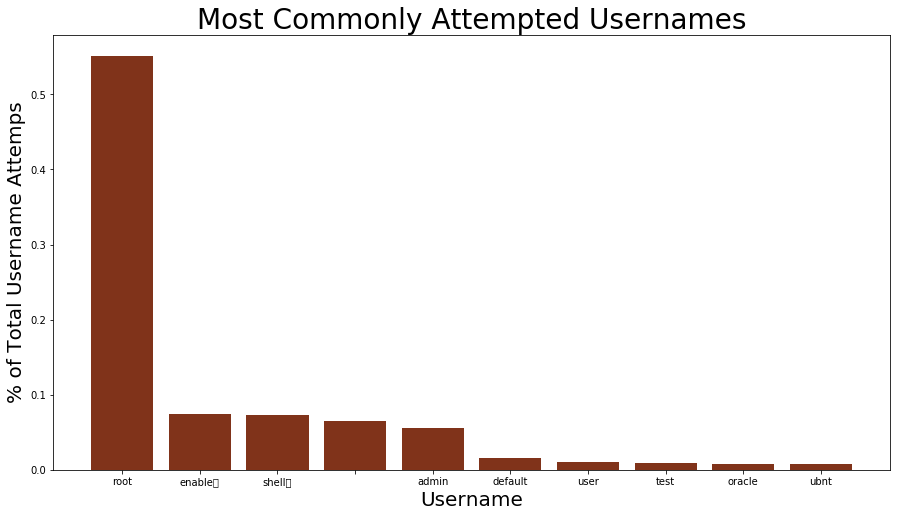

In [88]:
fig = plt.figure()
fig.set_size_inches(15, 8, forward=True)
plt.bar(range(len(a)), list(a.values()), align='center', color = (0.5, 0.2, 0.1))
plt.xticks(range(len(a)), list(a.keys()))
plt.title('Most Commonly Attempted Usernames', fontsize = 28)
plt.xlabel('Username', fontsize=20)
plt.ylabel('% of Total Username Attemps', fontsize=20)


plt.show()

In [20]:
SSH={}
for i in res3:
    if 'Remote SSH version' in i:
        if i not in SSH.keys():
            SSH[i]=0
        else:
            SSH[i]+=1
dict(Counter(SSH).most_common(10))

{"Remote SSH version: 'SSH-2.0-Go'\n": 367,
 "Remote SSH version: 'SSH-2.0-Granados-1.0'\n": 197,
 "Remote SSH version: 'SSH-2.0-OpenSSH_7.3'\n": 2182,
 "Remote SSH version: 'SSH-2.0-PUTTY'\n": 1224,
 "Remote SSH version: 'SSH-2.0-libssh-0.1'\n": 183,
 "Remote SSH version: 'SSH-2.0-libssh-0.2'\n": 773,
 "Remote SSH version: 'SSH-2.0-libssh2_1.4.3'\n": 305,
 "Remote SSH version: 'SSH-2.0-libssh2_1.6.0'\n": 313,
 "Remote SSH version: 'SSH-2.0-libssh2_1.7.0'\n": 2395,
 "Remote SSH version: 'SSH-2.0-libssh2_1.8.0'\n": 111}

In [21]:
found_commands = []
for i in res3:
    if 'Command found:' in i:
        temp=i.split(':')[1]
        found_commands.append(temp)
found_commands[:10]

[' enable \n',
 ' sh \n',
 ' /bin/busybox MIRAI\n',
 ' enable \n',
 ' sh \n',
 ' cat /proc/mounts\n',
 ' /bin/busybox IMTFF\n',
 ' cd /dev/shm\n',
 ' cat .s\n',
 ' cp /bin/echo .s\n']

In [22]:
found_commands_dic={}

for i in found_commands:
    if i not in found_commands_dic.keys():
        found_commands_dic[i]=0
    else:
        found_commands_dic[i]+=1
        
dict(Counter(found_commands_dic).most_common(10))

{' /bin/busybox iDdosYou\n': 46395,
 ' rm /.human\n': 22095,
 ' rm /.sh\n': 22550,
 ' rm /.t\n': 22550,
 ' rm /dev/.human\n': 21767,
 ' rm /dev/.sh\n': 22196,
 ' rm /dev/.t\n': 22196,
 ' rm /proc/sys/fs/binfmt_misc/.human\n': 22606,
 ' rm /proc/sys/fs/binfmt_misc/.sh\n': 23050,
 ' rm /proc/sys/fs/binfmt_misc/.t\n': 23050}

In [23]:
not_found_commands = []
for i in res3:
    if 'Command not found:' in i:
        temp=i.split(':')[1]
        not_found_commands.append(temp)
not_found_commands[:10]

[' system\n',
 ' shell\n',
 ' system\n',
 ' shell\n',
 ' while read i\n',
 ' system\n',
 ' shell\n',
 ' while read i\n',
 ' system\n',
 ' shell\n']

In [24]:
not_found_commands_dic={}

for i in not_found_commands:
    if i not in not_found_commands_dic.keys():
        not_found_commands_dic[i]=0
    else:
        not_found_commands_dic[i]+=1
        
dict(Counter(not_found_commands_dic).most_common(9))

{' ./JuYfouyf87 telnet\n': 1982,
 ' ./ccAD selfrep.wget\n': 4596,
 ' ./jUYfouyf87 telnet\n': 1357,
 ' bah\n': 2131,
 ' linuxshell\n': 4199,
 ' shell\n': 16915,
 ' start\n': 2131,
 ' system\n': 8588,
 ' while read i\n': 7224}